In [2]:
#some code for checking gpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!pip install keras-tuner


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import os
import tqdm
import pandas as pd
import time, warnings
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from PIL import Image
from sklearn.model_selection import KFold
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.trial import Trial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import random
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
    Activation,
)


In [14]:

def normalize(clip):
    normalized_clip = (clip - np.min(clip)) / (np.max(clip) - np.min(clip))
    return normalized_clip

def create_data():
  df = pd.read_csv('/content/drive/MyDrive/UrbanSound8kv2/Data_extracted_2/processed_data.csv')
  folds = {}
  for i in range(1,11):
    fold = df[df['fold'] == i]
    folds[f"fold{i}"] = [fold["mean_mfcc"],fold["labelID"]]
  return folds


def conv_array(root_folder):
    metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8kv2/Data_extracted_2/processed_data.csv')
    folds = {}
    for class_label in range(1, 11):
        print(f"processing fold{class_label}")
        class_folder_path = os.path.join(root_folder, f"fold{class_label}")
        image_data = []
        all_labels = []
        if not os.path.exists(class_folder_path):
            continue  # Skip if the folder doesn't exist
        for filename in tqdm.tqdm(os.listdir(class_folder_path)):
            if filename.endswith(".png"):
                image_path = os.path.join(class_folder_path, filename)
                image = Image.open(image_path)
                new_filename = filename.replace('.png', '.wav')
                row_num = metadata[metadata['slice_file_name'] == new_filename].index
                if not row_num.empty:
                    image_array = np.array(image)
                    if not image_array.shape == (40, 33):
                      continue
                    image_array = normalize(image_array)
                    #reshape_size = image_array.shape + (1,)
                    image_array = image_array.reshape(40,33,1)
                    label = metadata.iloc[row_num]['labelID'].values[0]
                    all_labels.append(label)
                    image_data.append(image_array)
                else:
                    print(f'{new_filename} not found')
                    continue
        image_data = np.array(image_data)
        all_labels = np.array(all_labels)
        all_labels = to_categorical(all_labels - 1, num_classes=10)
        folds[f"fold{class_label}"] = [image_data, all_labels]
    return folds


root_folder = r"/content/drive/MyDrive/UrbanSound8kv2/Data_extracted_2/melspec"
data = conv_array(root_folder)
input_shape = data['fold1'][0].shape
print(input_shape)

processing fold1


100%|██████████| 873/873 [00:03<00:00, 280.04it/s]


processing fold2


100%|██████████| 888/888 [00:02<00:00, 343.37it/s]


processing fold3


100%|██████████| 925/925 [00:02<00:00, 339.04it/s]


processing fold4


100%|██████████| 990/990 [00:03<00:00, 314.25it/s]


processing fold5


100%|██████████| 936/936 [00:03<00:00, 262.96it/s]


processing fold6


100%|██████████| 823/823 [00:03<00:00, 267.86it/s]


processing fold7


100%|██████████| 838/838 [00:02<00:00, 343.41it/s]


processing fold8


100%|██████████| 806/806 [00:02<00:00, 339.93it/s]


processing fold9


100%|██████████| 816/816 [00:02<00:00, 324.25it/s]


processing fold10


100%|██████████| 837/837 [00:02<00:00, 296.39it/s]

(873, 40, 33, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

Training using fold1 as validation
Epoch 1/30
62/62 [==============================] - 8s 9ms/step - loss: 2.1524 - accuracy: 0.2051 - val_loss: 1.7519 - val_accuracy: 0.3414
Epoch 2/30
62/62 [==============================] - 0s 5ms/step - loss: 1.8077 - accuracy: 0.3177 - val_loss: 1.6367 - val_accuracy: 0.3505
Epoch 3/30
62/62 [==============================] - 1s 10ms/step - loss: 1.7287 - accuracy: 0.3453 - val_loss: 1.6913 - val_accuracy: 0.3803
Epoch 4/30
62/62 [==============================] - 0s 8ms/step - loss: 1.6762 - accuracy: 0.3658 - val_loss: 1.5182 - val_accuracy: 0.4181
Epoch 5/30
62/62 [==============================] - 0s 5ms/step - loss: 1.6108 - accuracy: 0.4015 - val_loss: 1.5351 - val_accuracy: 0.3906
Epoch 6/30
62/62 [==============================] - 0s 5ms/step - loss: 1.5609 - accuracy: 0.4244 - val_loss: 1.4738 - val_accuracy: 0.4227
Epoch 7/30
62/62 [==============================] - 0s 6ms/step - loss: 1.5037 - accuracy: 0.4429 - val_loss: 1.3963 - val_a

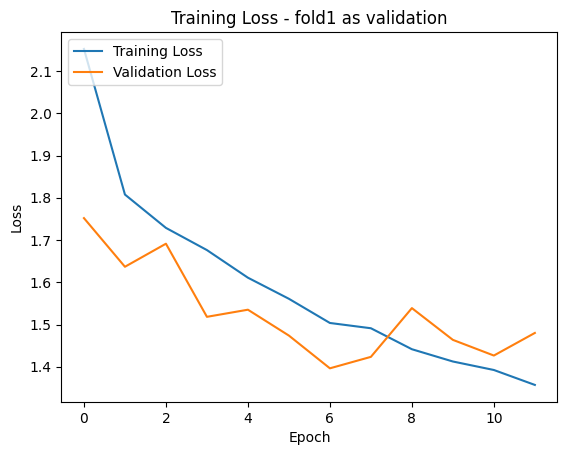

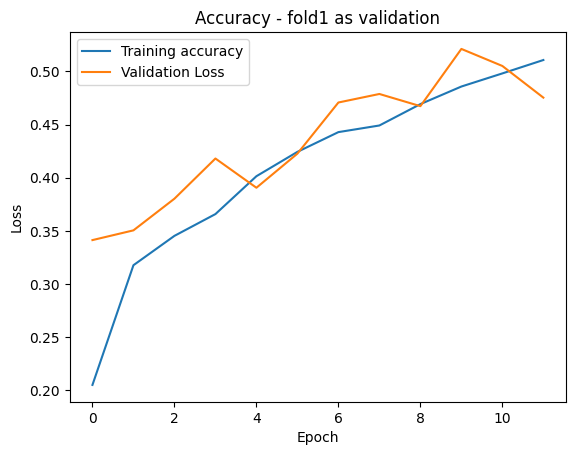

 10%|█         | 1/10 [00:13<02:00, 13.35s/it]

Training using fold2 as validation
Epoch 1/30
62/62 [==============================] - 3s 11ms/step - loss: 2.1724 - accuracy: 0.1945 - val_loss: 1.8478 - val_accuracy: 0.3333
Epoch 2/30
62/62 [==============================] - 1s 8ms/step - loss: 1.8103 - accuracy: 0.3123 - val_loss: 1.6790 - val_accuracy: 0.3637
Epoch 3/30
62/62 [==============================] - 0s 7ms/step - loss: 1.7038 - accuracy: 0.3526 - val_loss: 1.6940 - val_accuracy: 0.3727
Epoch 4/30
62/62 [==============================] - 0s 8ms/step - loss: 1.5960 - accuracy: 0.3962 - val_loss: 1.6637 - val_accuracy: 0.3818
Epoch 5/30
62/62 [==============================] - 0s 8ms/step - loss: 1.5497 - accuracy: 0.4312 - val_loss: 1.7967 - val_accuracy: 0.3626
Epoch 6/30
62/62 [==============================] - 0s 7ms/step - loss: 1.5097 - accuracy: 0.4429 - val_loss: 1.5242 - val_accuracy: 0.4347
Epoch 7/30
62/62 [==============================] - 0s 7ms/step - loss: 1.4412 - accuracy: 0.4762 - val_loss: 1.4879 - val_a

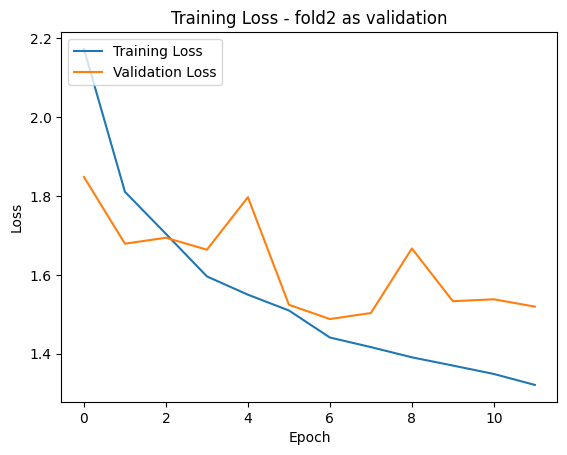

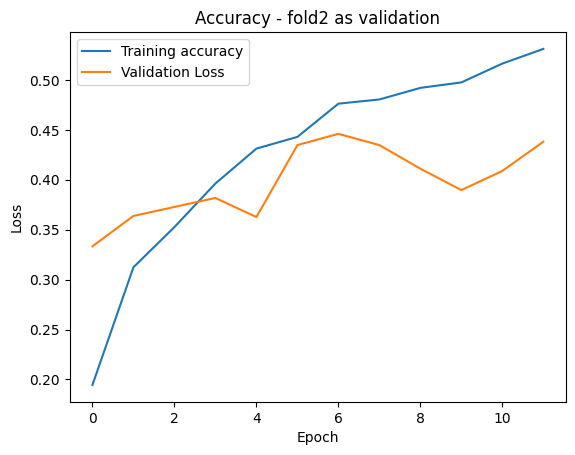

 20%|██        | 2/10 [00:25<01:41, 12.68s/it]

Training using fold3 as validation
Epoch 1/30
61/61 [==============================] - 2s 9ms/step - loss: 2.1729 - accuracy: 0.1816 - val_loss: 1.9115 - val_accuracy: 0.2919
Epoch 2/30
61/61 [==============================] - 0s 6ms/step - loss: 1.8206 - accuracy: 0.3032 - val_loss: 1.7148 - val_accuracy: 0.3676
Epoch 3/30
61/61 [==============================] - 0s 5ms/step - loss: 1.7424 - accuracy: 0.3314 - val_loss: 1.6194 - val_accuracy: 0.3924
Epoch 4/30
61/61 [==============================] - 0s 6ms/step - loss: 1.6877 - accuracy: 0.3572 - val_loss: 1.6412 - val_accuracy: 0.3762
Epoch 5/30
61/61 [==============================] - 0s 5ms/step - loss: 1.6104 - accuracy: 0.3870 - val_loss: 1.6219 - val_accuracy: 0.3978
Epoch 6/30
61/61 [==============================] - 0s 5ms/step - loss: 1.5485 - accuracy: 0.4228 - val_loss: 1.5528 - val_accuracy: 0.4032
Epoch 7/30
61/61 [==============================] - 0s 5ms/step - loss: 1.5187 - accuracy: 0.4358 - val_loss: 1.5911 - val_ac

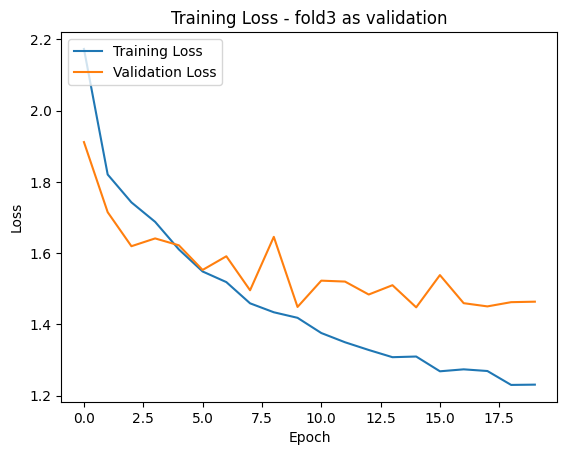

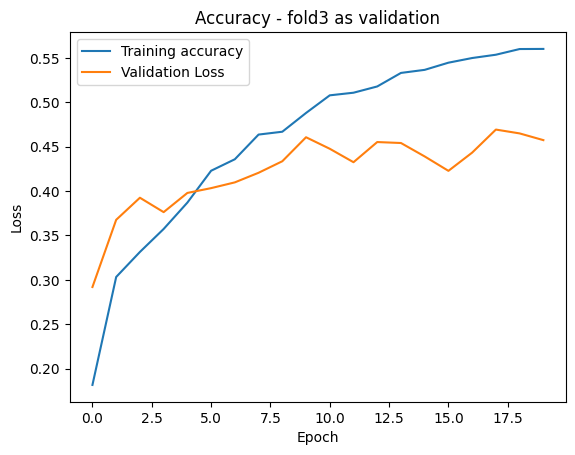

 30%|███       | 3/10 [00:48<02:00, 17.21s/it]

Training using fold4 as validation
Epoch 1/30
61/61 [==============================] - 3s 12ms/step - loss: 2.1511 - accuracy: 0.2036 - val_loss: 1.9311 - val_accuracy: 0.2162
Epoch 2/30
61/61 [==============================] - 0s 6ms/step - loss: 1.8364 - accuracy: 0.2991 - val_loss: 1.6831 - val_accuracy: 0.3576
Epoch 3/30
61/61 [==============================] - 0s 5ms/step - loss: 1.7308 - accuracy: 0.3358 - val_loss: 1.7019 - val_accuracy: 0.3374
Epoch 4/30
61/61 [==============================] - 0s 5ms/step - loss: 1.6627 - accuracy: 0.3631 - val_loss: 1.6071 - val_accuracy: 0.3909
Epoch 5/30
61/61 [==============================] - 0s 6ms/step - loss: 1.5949 - accuracy: 0.4070 - val_loss: 1.6968 - val_accuracy: 0.3970
Epoch 6/30
61/61 [==============================] - 0s 6ms/step - loss: 1.5548 - accuracy: 0.4243 - val_loss: 1.5626 - val_accuracy: 0.3919
Epoch 7/30
61/61 [==============================] - 0s 5ms/step - loss: 1.5100 - accuracy: 0.4327 - val_loss: 1.6202 - val_a

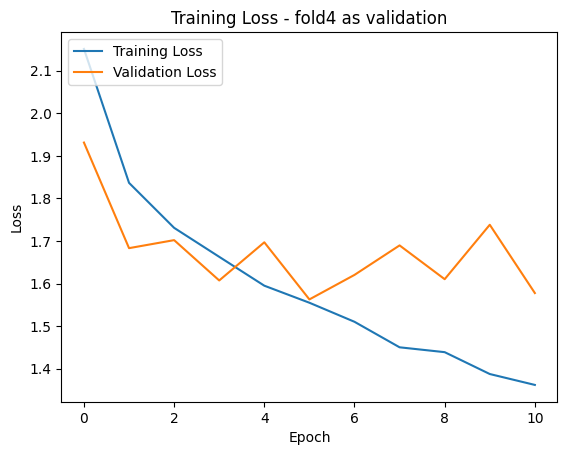

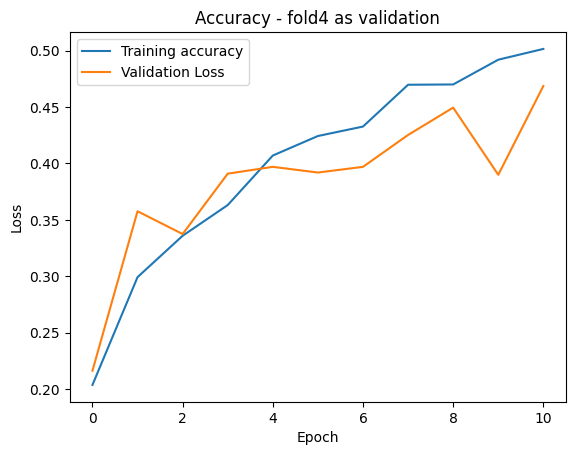

 40%|████      | 4/10 [00:55<01:20, 13.48s/it]

Training using fold5 as validation
Epoch 1/30
61/61 [==============================] - 2s 9ms/step - loss: 2.0846 - accuracy: 0.2328 - val_loss: 1.8769 - val_accuracy: 0.2682
Epoch 2/30
61/61 [==============================] - 0s 6ms/step - loss: 1.7795 - accuracy: 0.3285 - val_loss: 1.7784 - val_accuracy: 0.2650
Epoch 3/30
61/61 [==============================] - 0s 5ms/step - loss: 1.6902 - accuracy: 0.3678 - val_loss: 1.7032 - val_accuracy: 0.3419
Epoch 4/30
61/61 [==============================] - 0s 7ms/step - loss: 1.6065 - accuracy: 0.4035 - val_loss: 1.6038 - val_accuracy: 0.3269
Epoch 5/30
61/61 [==============================] - 0s 5ms/step - loss: 1.5950 - accuracy: 0.4102 - val_loss: 1.6247 - val_accuracy: 0.3632
Epoch 6/30
61/61 [==============================] - 0s 6ms/step - loss: 1.5452 - accuracy: 0.4325 - val_loss: 1.5570 - val_accuracy: 0.4124
Epoch 7/30
61/61 [==============================] - 0s 6ms/step - loss: 1.4864 - accuracy: 0.4511 - val_loss: 1.5150 - val_ac

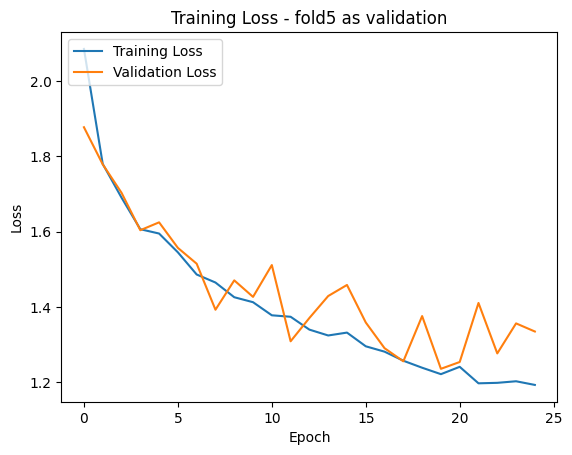

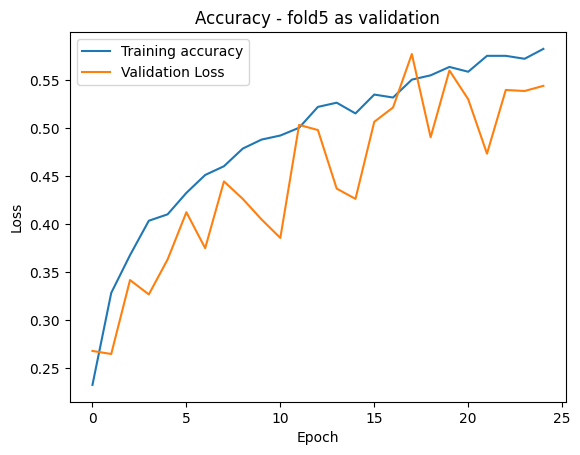

 50%|█████     | 5/10 [01:18<01:23, 16.67s/it]

Training using fold6 as validation
Epoch 1/30
62/62 [==============================] - 3s 12ms/step - loss: 2.1381 - accuracy: 0.2048 - val_loss: 1.7614 - val_accuracy: 0.3256
Epoch 2/30
62/62 [==============================] - 0s 7ms/step - loss: 1.8078 - accuracy: 0.3171 - val_loss: 1.6117 - val_accuracy: 0.3657
Epoch 3/30
62/62 [==============================] - 0s 7ms/step - loss: 1.7326 - accuracy: 0.3389 - val_loss: 1.5673 - val_accuracy: 0.3560
Epoch 4/30
62/62 [==============================] - 0s 8ms/step - loss: 1.6510 - accuracy: 0.3796 - val_loss: 1.5914 - val_accuracy: 0.3913
Epoch 5/30
62/62 [==============================] - 0s 8ms/step - loss: 1.5955 - accuracy: 0.4074 - val_loss: 1.5081 - val_accuracy: 0.4131
Epoch 6/30
62/62 [==============================] - 0s 7ms/step - loss: 1.5046 - accuracy: 0.4442 - val_loss: 1.4118 - val_accuracy: 0.4557
Epoch 7/30
62/62 [==============================] - 0s 8ms/step - loss: 1.4724 - accuracy: 0.4664 - val_loss: 1.3994 - val_a

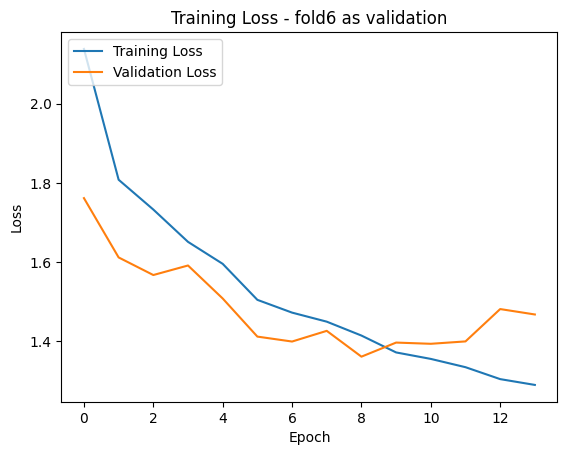

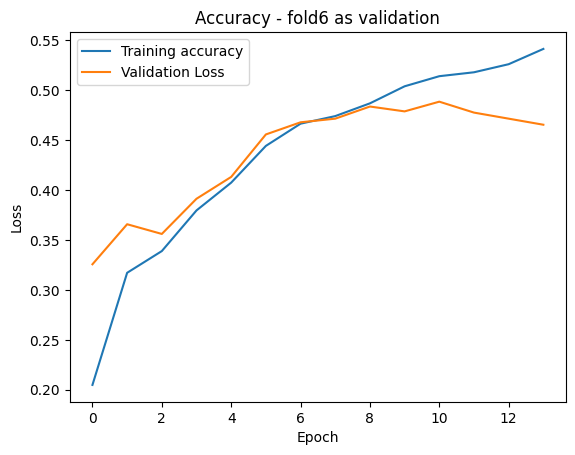

 60%|██████    | 6/10 [01:27<00:57, 14.27s/it]

Training using fold7 as validation
Epoch 1/30
62/62 [==============================] - 2s 9ms/step - loss: 2.1060 - accuracy: 0.2132 - val_loss: 1.8008 - val_accuracy: 0.3067
Epoch 2/30
62/62 [==============================] - 0s 6ms/step - loss: 1.7788 - accuracy: 0.3253 - val_loss: 1.6788 - val_accuracy: 0.3341
Epoch 3/30
62/62 [==============================] - 0s 7ms/step - loss: 1.7285 - accuracy: 0.3449 - val_loss: 1.6503 - val_accuracy: 0.3842
Epoch 4/30
62/62 [==============================] - 0s 7ms/step - loss: 1.6419 - accuracy: 0.3821 - val_loss: 1.6176 - val_accuracy: 0.3473
Epoch 5/30
62/62 [==============================] - 0s 6ms/step - loss: 1.5938 - accuracy: 0.4055 - val_loss: 1.5250 - val_accuracy: 0.4702
Epoch 6/30
62/62 [==============================] - 0s 7ms/step - loss: 1.5216 - accuracy: 0.4364 - val_loss: 1.5322 - val_accuracy: 0.4033
Epoch 7/30
62/62 [==============================] - 0s 7ms/step - loss: 1.4903 - accuracy: 0.4511 - val_loss: 1.5763 - val_ac

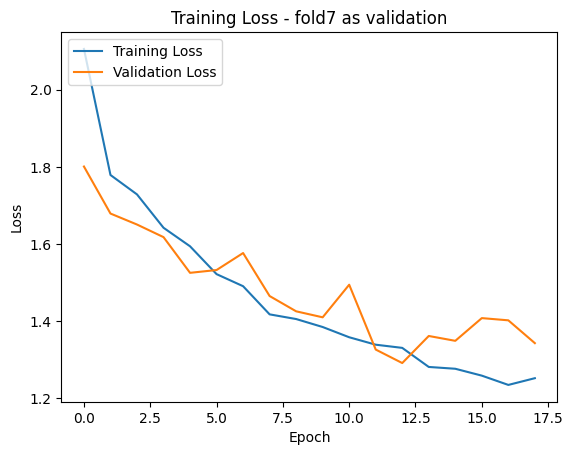

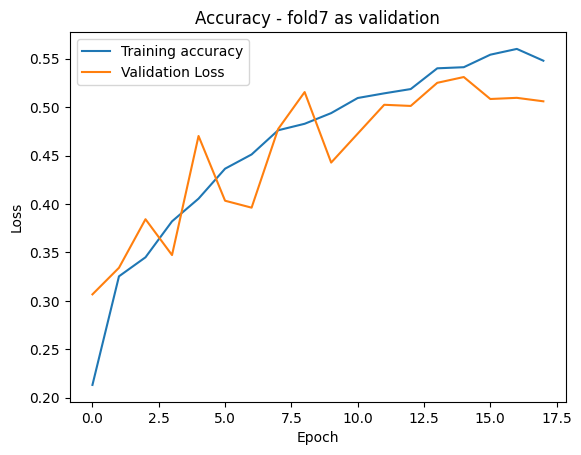

 70%|███████   | 7/10 [01:40<00:41, 13.80s/it]

Training using fold8 as validation
Epoch 1/30
62/62 [==============================] - 2s 9ms/step - loss: 2.1281 - accuracy: 0.2011 - val_loss: 1.8073 - val_accuracy: 0.3362
Epoch 2/30
62/62 [==============================] - 0s 6ms/step - loss: 1.8279 - accuracy: 0.3034 - val_loss: 1.6105 - val_accuracy: 0.3921
Epoch 3/30
62/62 [==============================] - 0s 6ms/step - loss: 1.7305 - accuracy: 0.3341 - val_loss: 1.5399 - val_accuracy: 0.4305
Epoch 4/30
62/62 [==============================] - 0s 6ms/step - loss: 1.6678 - accuracy: 0.3625 - val_loss: 1.4947 - val_accuracy: 0.4417
Epoch 5/30
62/62 [==============================] - 0s 7ms/step - loss: 1.5871 - accuracy: 0.4051 - val_loss: 1.4141 - val_accuracy: 0.5199
Epoch 6/30
62/62 [==============================] - 0s 6ms/step - loss: 1.5405 - accuracy: 0.4227 - val_loss: 1.3543 - val_accuracy: 0.5856
Epoch 7/30
62/62 [==============================] - 0s 6ms/step - loss: 1.5132 - accuracy: 0.4375 - val_loss: 1.4235 - val_ac

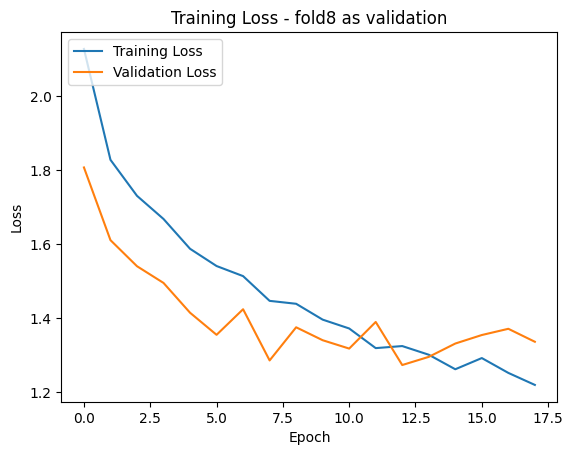

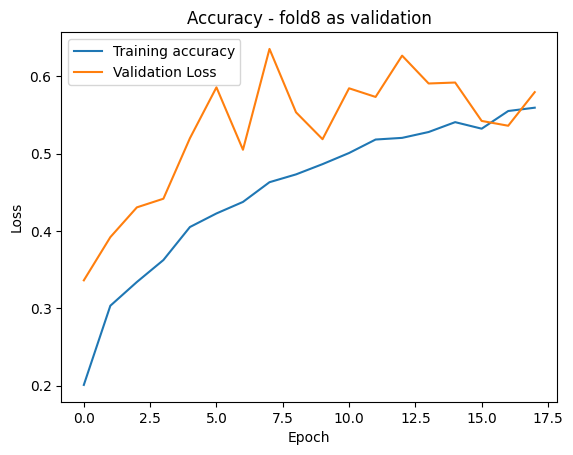

 80%|████████  | 8/10 [01:53<00:26, 13.41s/it]

Training using fold9 as validation
Epoch 1/30
62/62 [==============================] - 3s 13ms/step - loss: 2.2016 - accuracy: 0.1800 - val_loss: 1.8791 - val_accuracy: 0.2390
Epoch 2/30
62/62 [==============================] - 0s 6ms/step - loss: 1.8509 - accuracy: 0.3007 - val_loss: 1.8119 - val_accuracy: 0.2770
Epoch 3/30
62/62 [==============================] - 0s 6ms/step - loss: 1.7621 - accuracy: 0.3314 - val_loss: 1.7335 - val_accuracy: 0.2708
Epoch 4/30
62/62 [==============================] - 0s 6ms/step - loss: 1.7156 - accuracy: 0.3588 - val_loss: 1.7082 - val_accuracy: 0.2990
Epoch 5/30
62/62 [==============================] - 0s 6ms/step - loss: 1.6226 - accuracy: 0.3898 - val_loss: 1.6341 - val_accuracy: 0.3407
Epoch 6/30
62/62 [==============================] - 0s 6ms/step - loss: 1.5626 - accuracy: 0.4147 - val_loss: 1.6931 - val_accuracy: 0.3640
Epoch 7/30
62/62 [==============================] - 0s 6ms/step - loss: 1.5173 - accuracy: 0.4339 - val_loss: 1.5101 - val_a

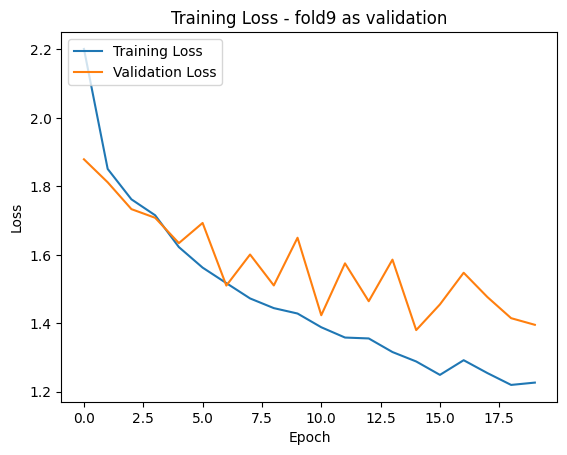

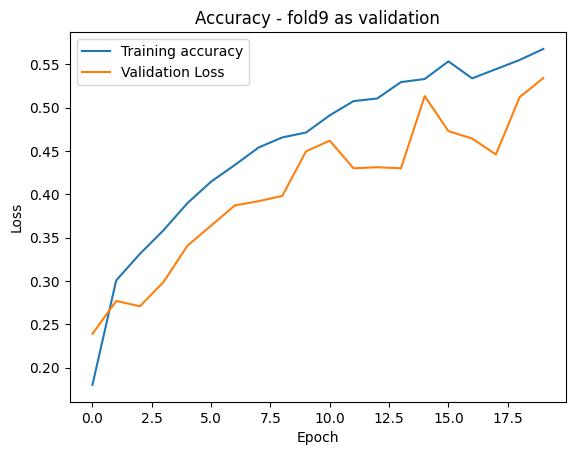

 90%|█████████ | 9/10 [02:06<00:13, 13.21s/it]

Training using fold10 as validation
Epoch 1/30
62/62 [==============================] - 3s 12ms/step - loss: 2.1335 - accuracy: 0.2038 - val_loss: 1.8215 - val_accuracy: 0.2939
Epoch 2/30
62/62 [==============================] - 1s 8ms/step - loss: 1.8151 - accuracy: 0.3107 - val_loss: 1.9061 - val_accuracy: 0.2557
Epoch 3/30
62/62 [==============================] - 0s 8ms/step - loss: 1.7027 - accuracy: 0.3576 - val_loss: 1.9258 - val_accuracy: 0.2951
Epoch 4/30
62/62 [==============================] - 1s 8ms/step - loss: 1.6376 - accuracy: 0.3823 - val_loss: 1.7571 - val_accuracy: 0.3835
Epoch 5/30
62/62 [==============================] - 1s 8ms/step - loss: 1.5641 - accuracy: 0.4141 - val_loss: 1.7391 - val_accuracy: 0.3943
Epoch 6/30
62/62 [==============================] - 1s 8ms/step - loss: 1.5270 - accuracy: 0.4313 - val_loss: 1.7606 - val_accuracy: 0.4564
Epoch 7/30
62/62 [==============================] - 0s 7ms/step - loss: 1.5238 - accuracy: 0.4357 - val_loss: 1.7365 - val_

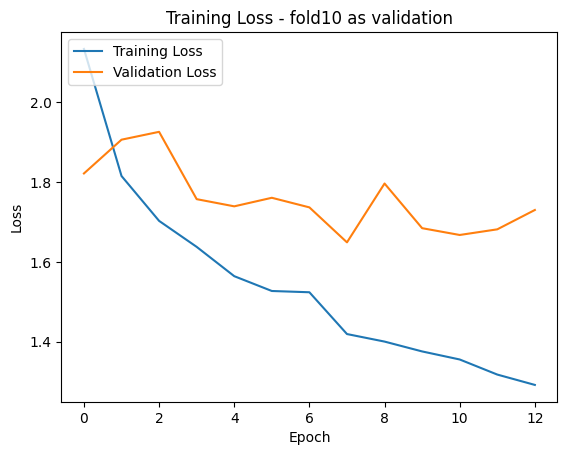

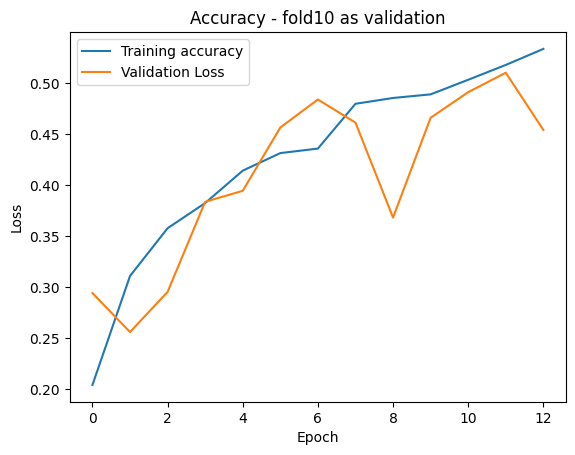

100%|██████████| 10/10 [02:18<00:00, 13.83s/it]

List of scores[0.4753722846508026, 0.4380630552768707, 0.45729729533195496, 0.46868687868118286, 0.5438033938407898, 0.4653705954551697, 0.5059666037559509, 0.5794044733047485, 0.5343137383460999, 0.45400238037109375]
Average accuracy: 0.4922280699014664


In [15]:
tensorflow.keras.backend.clear_session()
metric = 'accuracy' #evaluation metric
#metric = tensorflow.keras.metrics.MeanAveragePrecisionMetric(topn=2)
loss= 'categorical_crossentropy' #loss function

#training parameters
num_epoch = 30
batch_size =128
early_stop = 5 # early stoppping after 3 epochs with no improvement of test data

#objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.
objective='val_loss'
max_trials = 8 # how many model variations to test?
max_trial_retrys = 3 # how many trials per variation? (same model could perform differently)

# metadata.head(10)
# sns.countplot(metadata, y="class")
#plt.show()

#Building a hypermodel:
# function to build a hypermodel
# takes an argument from which to sample hyperparameters
def build_model(hp):
    model = Sequential()
    input = data['fold1']
    input = input[0]
    model.add(Conv2D(hp.Int('input_units', min_value=32, max_value=256, step=32), (3, 3), input_shape=input.shape[1:]))
    model.add(Activation('tanh'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers, this parameter will have a convnet with 2–5 convolutions
        model.add(Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=256, step=32), (3, 3)))
        model.add(Activation('tanh'))
        # adding dropout
        model.add(tensorflow.keras.layers.Dropout(rate=hp.Float('rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())

    for i in range(hp.Int('n_connections', 1, 4)):
        model.add(Dense(hp.Choice(f'n_nodes',
                                  values=[128, 256, 512, 1024])))
        model.add(Activation('tanh'))

    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer=Adam(learning_rate=1e-3), #optimization algorithm used is Adam
                  loss=loss,
                  metrics=[metric])

    return model

def build_mlp_model(hp):
    model = Sequential()

    input_shape = data['fold1'][0].shape[1:]

    # Flatten the input for MLP
    model.add(Flatten(input_shape=input_shape))

    # Add dense layers
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Dense(hp.Choice(f'dense_{i}_units',
                                  values=[128, 256, 512, 1024])))
        model.add(Activation('tanh'))

        # Adding dropout
        model.add(Dropout(rate=hp.Float('rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss=loss,
                  metrics=[metric])

    return model


#get optimal hyperparameters using
def tuner(X, y, num_epoch, batch_size):
    EarlyStoppingCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop)
    tuner = RandomSearch(build_model, objective=objective, max_trials=max_trials, executions_per_trial=max_trial_retrys, metrics=[metric])
    tuner.search(x=X, y=y, epochs=num_epoch, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStoppingCallback]) #10% is validation data
    best_hyperparameters = tuner.oracle.get_best_trials(1)[0].hyperparameters.values
    return best_hyperparameters

#hyperparameters2 = tuner(X, y, num_epoch, batch_size)
#print(hyperparameters2)

def model_k_cross(hyperparameters, data):
    hp = kt.HyperParameters()
    list_scores = []
    for key, value in hyperparameters.items():
        hp.Fixed(key, value)

    for fold_name, fold_data in tqdm.tqdm(data.items()):
        tensorflow.keras.backend.clear_session()
        print(f"Training using {fold_name} as validation")
        X_val, y_val = fold_data[0], fold_data[1]
        X_train = []
        y_train = []

        for other_fold_name, other_fold_data in data.items():
            if other_fold_name == fold_name:
                continue

            X = other_fold_data[0]
            y = other_fold_data[1]
            X_train.extend(X)
            y_train.extend(y)

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        cmodel = build_mlp_model(hp)
        cmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        EarlyStoppingCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop)

        history = cmodel.fit(X_train, y_train, epochs=num_epoch, batch_size=batch_size,
                   callbacks=[EarlyStoppingCallback], validation_data=(X_val, y_val))

        # Evaluation
        scores = cmodel.evaluate(X_val, y_val)
        print("Validation accuracy:", scores[1])
        list_scores.append(scores[1])


        # Plot training history - loss
        print(history.history.keys())
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f"Training Loss - {fold_name} as validation")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
        plt.show()

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f"Accuracy - {fold_name} as validation")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training accuracy', 'Validation Loss'], loc='upper left')
        plt.show()


    average_acc = sum(list_scores) / len(list_scores)
    print(f'List of scores{list_scores}')
    print(f'Average accuracy: {average_acc}')




#creating custom hyperparameters to inspect model performance,inspired by the network we found on kaggle
custom_hyperparameters = {
        'input_units': 224,
        'n_layers': 5,
        'conv_0_units': 64,
        'rate': 0.2,
        'n_connections': 1,
        'n_nodes': 1012,
        'conv_1_units': 128,
    }

model_k_cross(custom_hyperparameters, data)
#model(best_hyperparameters_overall)
